<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#EnvFit" data-toc-modified-id="EnvFit-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EnvFit</a></span><ul class="toc-item"><li><span><a href="#setup" data-toc-modified-id="setup-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>setup</a></span></li><li><span><a href="#Study-condition" data-toc-modified-id="Study-condition-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Study condition</a></span></li><li><span><a href="#Disease" data-toc-modified-id="Disease-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Disease</a></span><ul class="toc-item"><li><span><a href="#Disease-vs-healthy" data-toc-modified-id="Disease-vs-healthy-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Disease vs healthy</a></span></li></ul></li><li><span><a href="#Westernized" data-toc-modified-id="Westernized-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Westernized</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Westernized-&amp;-Gender" data-toc-modified-id="Westernized-&amp;-Gender-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Westernized &amp; Gender</a></span></li><li><span><a href="#Westerinzed-+-gender-+-age-+-bmi" data-toc-modified-id="Westerinzed-+-gender-+-age-+-bmi-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Westerinzed + gender + age + bmi</a></span></li><li><span><a href="#Westerinzed-+-gender-+-age-+-disease" data-toc-modified-id="Westerinzed-+-gender-+-age-+-disease-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Westerinzed + gender + age + disease</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* EnvFit analysis with environmental variables

# Var

In [5]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# metadata
## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# params
threads = 8

# Init

In [6]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(phyloseq)
library(vegan)
library(LeyLabRMisc)

In [7]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ 


# Load

In [8]:
# loading PCoA objects
F = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_pcoa.qs'
brk_cls_pcoa_objA = qs::qread(F, nthreads=4)
names(brk_cls_pcoa_objA) =  c('bray', 'jaccard', 'wunifrac_phy', 'unifrac_phy')

F = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_trt-maj_pcoa.qs'
brk_cls_pcoa_objB = qs::qread(F, nthreads=4)
names(brk_cls_pcoa_objB) =  c('wunifrac_trt', 'unifrac_trt')

In [9]:
# loading PCoA objects
F = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_cog_pcoa.qs'
brk_cls_pcoa_objC = qs::qread(F, nthreads=4)
names(brk_cls_pcoa_objC) =  c('wunifrac_cog', 'unifrac_cog')

F = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_cogcat_pcoa.qs'
brk_cls_pcoa_objD = qs::qread(F, nthreads=4)
names(brk_cls_pcoa_objD) =  c('wunifrac_cogcat', 'unifrac_cogcat')

In [10]:
# loading PCoA objects
F = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_pfam_pcoa.qs'
brk_cls_pcoa_objE = qs::qread(F, nthreads=4)
names(brk_cls_pcoa_objE) =  c('wunifrac_pfam', 'unifrac_pfam')

F = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_pfamcat_pcoa.qs'
brk_cls_pcoa_objF = qs::qread(F, nthreads=4)
names(brk_cls_pcoa_objF) =  c('wunifrac_pfamcat', 'unifrac_pfamcat')

In [11]:
# combining lists
brk_cls_pcoa_obj = do.call(c, list(brk_cls_pcoa_objA, brk_cls_pcoa_objB,
                                   brk_cls_pcoa_objC, brk_cls_pcoa_objD,
                                   brk_cls_pcoa_objE, brk_cls_pcoa_objF))
brk_cls_pcoa_objA = brk_cls_pcoa_objB = NULL
brk_cls_pcoa_objC = brk_cls_pcoa_objD = NULL
brk_cls_pcoa_objE = brk_cls_pcoa_objF = NULL
brk_cls_pcoa_obj %>% names

[1] "bray"             "jaccard"          "wunifrac_phy"     "unifrac_phy"     
 [5] "wunifrac_trt"     "unifrac_trt"      "wunifrac_cog"     "unifrac_cog"     
 [9] "wunifrac_cogcat"  "unifrac_cogcat"   "wunifrac_pfam"    "unifrac_pfam"    
[13] "wunifrac_pfamcat" "unifrac_pfamcat"

In [12]:
# metadata
meta = Fread(metadata_file) 
meta

dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,TRAVELRES1_2,stool,no,control,healthy,25,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
Bengtsson-PalmeJ_2015,TRAVELRES11,TRAVELRES11_12,stool,no,control,healthy,22,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446


In [13]:
# checking overlap of sample IDs
overlap(meta$Sample, rownames(brk_cls_pcoa_obj[[1]]$points))

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [14]:
brk_cls_pcoa_obj[[1]] %>% names

[1] "points" "eig"    "x"      "ac"     "GOF"

In [15]:
brk_cls_pcoa_obj[[1]]$points %>% head

A01_02_1FE,-0.1804197,-0.01788646,-0.1861345,-0.1739163,0.11140233
A02_01_1FE,-0.2904995,0.09745770,-0.2923586,-0.1891436,0.09415157
⋮,⋮,⋮,⋮,⋮,⋮
A04_04_1FE,-0.4301491,0.03080745,-0.05104947,0.006512958,0.1369238
A05_01_1FE,-0.2731445,-0.07294111,-0.22378310,-0.061394365,0.1517285


# EnvFit

## setup

In [70]:
#' envfit in parallel 
#' @return data.frame
envFit = function(col_idx, env, pcoa, perm=9, choices=c(1,2)){
    x = intersect(rownames(pcoa$points), rownames(env))
    E = env[x,col_idx,drop=FALSE]
    E[,1] = E[,1] %>% as.factor %>% as.numeric %>% scale
    pcoa$points = pcoa$points[x,]
    fit = vegan::envfit(pcoa, E, perm = perm, choices=choices, na.rm=TRUE)
    fit = data.frame((fit$vectors)$arrows, (fit$vectors)$r, (fit$vectors)$pvals)
    return(fit)
}

In [71]:
#' envfit in parallel
envfit_parallel = function(pcoa, env, nperm=99, threads=1, choices=c(1,2)){
    doParallel::registerDoParallel(threads)
    fit = 1:ncol(env) %>% as.list %>%
        plyr::llply(envFit, env=env, pcoa=pcoa, perm=nperm, 
                    choices=choices, .parallel=threads > 1) %>%
        do.call(rbind, .) %>%
        mutate(name = rownames(.)) %>%
        rename('r2' = X.fit.vectors..r,
               'pval' = X.fit.vectors..pvals) %>%
        mutate(pval = pval %>% as.Num,
               qval = pval %>% p.adjust)
    return(fit)
}

In [72]:
# number of permutations
nperm=99

## Study condition

In [73]:
# creating env object 
env = meta %>%
    filter.(!is.na(study_condition),
            study_condition != '',
            study_condition != 'control') %>%
    select.(Sample, study_condition) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,study_condition
,<chr>
SAMEA104335965,melanoma
SAMEA104335964,melanoma
⋮,⋮
SAM_19,melanoma
SAM_17,melanoma


In [74]:
# envfit: top PC
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2)
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.03835279,0.001,study_condition,0.001,1,Dim1,-0.3315861
jaccard,0.04521016,0.001,study_condition,0.001,1,Dim1,-0.1839603
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.007096205,0.115,study_condition,0.115,1,Dim2,-0.8658781
unifrac_pfamcat,0.060165685,0.001,study_condition,0.001,1,Dim2,-0.7768665


In [75]:
# significant?
specFit %>%
    filter(qval < 0.05)

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.03835279,0.001,study_condition,0.001,1,Dim1,-0.3315861
jaccard,0.04521016,0.001,study_condition,0.001,1,Dim1,-0.1839603
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unifrac_pfam,0.06109389,0.001,study_condition,0.001,1,Dim2,0.7916458
unifrac_pfamcat,0.06016568,0.001,study_condition,0.001,1,Dim2,-0.7768665


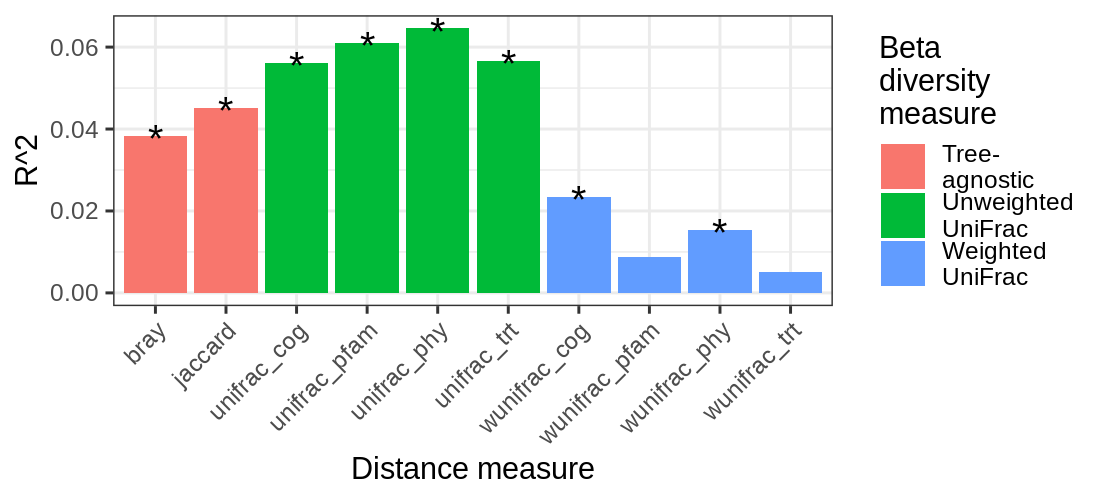

In [22]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, vjust=0.6) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,2.5)
plot(p)

## Disease

In [23]:
# creating env object 
env = meta %>%
    filter.(!is.na(disease), 
            disease != 'healthy') %>%
    select.(Sample, disease) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env$disease %>% table
env

.
                                                     ACVD 
                         525                          214 
                 fatty_liver     fatty_liver;hypertension 
                          38                           13 
             fatty_liver;T2D fatty_liver;T2D;hypertension 
                           3                            9 
                hypertension                          IGT 
                         163                           49 
         melanoma;metastases                         STEC 
                          64                           38 
                         T2D             T2D;hypertension 
                          53                            1 

,disease
,<chr>
SID31009,fatty_liver;hypertension
SID31021,
⋮,⋮
SZAXPI017591.140,
SZAXPI017592.142,


In [24]:
# envfit: top PC
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2)
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.006505758,0.019,disease,0.019,1,Dim1,0.5762059
jaccard,0.004447624,0.067,disease,0.067,1,Dim1,0.6439577
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.02215578,0.001,disease,0.001,1,Dim2,0.6276300
unifrac_pfamcat,0.06540061,0.001,disease,0.001,1,Dim2,0.9039804


In [25]:
# significant?
specFit %>%
    filter(qval < 0.05)

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.006505758,0.019,disease,0.019,1,Dim1,0.5762059
wunifrac_phy,0.009827180,0.005,disease,0.005,1,Dim1,0.9726226
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.02215578,0.001,disease,0.001,1,Dim2,0.6276300
unifrac_pfamcat,0.06540061,0.001,disease,0.001,1,Dim2,0.9039804


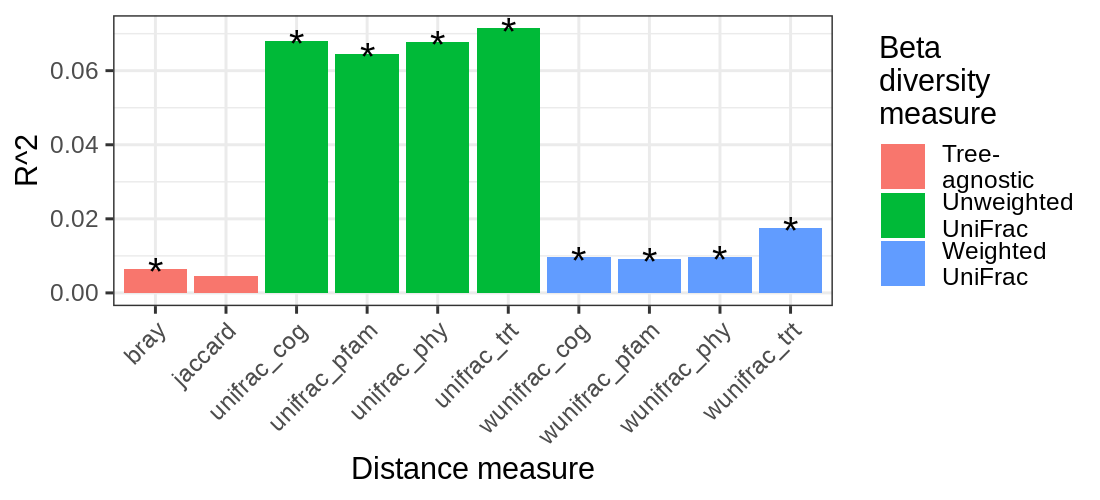

In [26]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, vjust=0.6) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,2.5)
plot(p)

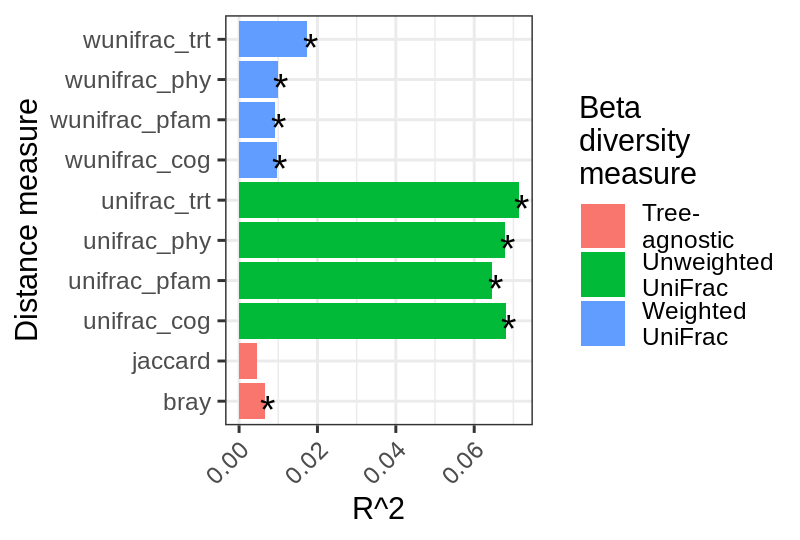

In [27]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, hjust=0.3, vjust=0.8) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(4,2.7)
plot(p)

### Disease vs healthy

In [28]:
# creating env object 
env = meta %>%
    filter.(!is.na(disease),
            disease != '') %>%
    mutate.(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    select.(Sample, disease) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env$disease %>% table
env

.
diseased  healthy 
     645     1773 

,disease
,<chr>
TRAVELRES1,healthy
TRAVELRES11,healthy
⋮,⋮
PNP_Validation_45,healthy
PNP_Validation_46,healthy


In [29]:
# envfit: top PC
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2)
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.07170935,0.001,disease,0.001,1,Dim1,-0.6405587
jaccard,0.07253159,0.001,disease,0.001,1,Dim1,-0.5347209
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.05819129,0.001,disease,0.001,1,Dim2,-0.6449060
unifrac_pfamcat,0.13037745,0.001,disease,0.001,1,Dim2,-0.7533321


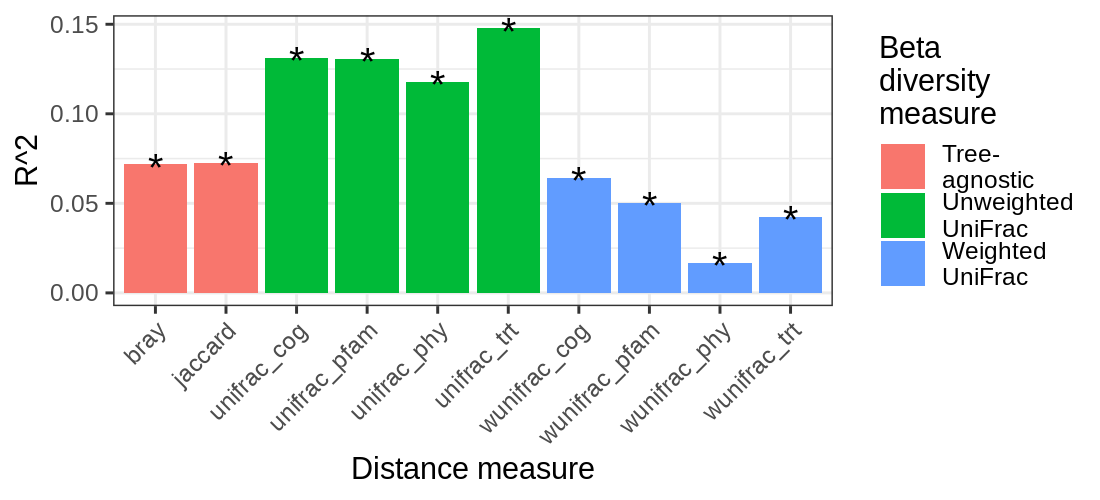

In [30]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, vjust=0.6) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,2.5)
plot(p)

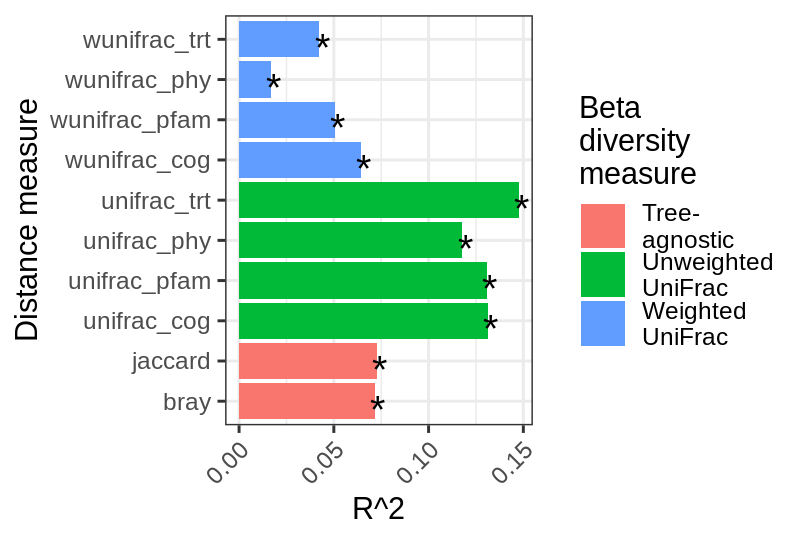

In [31]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, hjust=0.3, vjust=0.8) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(4,2.7)
plot(p)

## Westernized

In [32]:
# creating env object 
env = meta %>%
    filter.(!is.na(westernized),
            westernized != '') %>%
    select.(Sample, westernized) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,westernized
,<lgl>
TRAVELRES1,TRUE
TRAVELRES11,TRUE
⋮,⋮
PNP_Validation_45,TRUE
PNP_Validation_46,TRUE


In [33]:
# envfit: top 2 PCs
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2) # , Dim3, Dim4, Dim5) 
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.3090554,0.001,westernized,0.001,1,Dim1,0.9998195
jaccard,0.3019079,0.001,westernized,0.001,1,Dim1,0.9990030
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.2709416,0.001,westernized,0.001,1,Dim2,-0.1469739
unifrac_pfamcat,0.4179107,0.001,westernized,0.001,1,Dim2,0.1774489


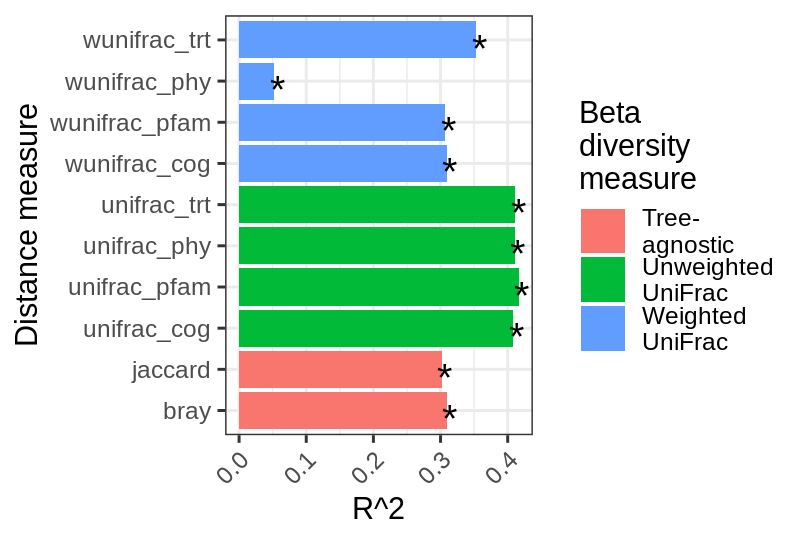

In [34]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, hjust=0.3, vjust=0.8) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(4,2.7)
plot(p)

## Gender

In [35]:
# creating env object 
env = meta %>%
    filter.(!is.na(gender),
            gender != '') %>%
    select.(Sample, gender) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,gender
,<chr>
TRAVELRES1,female
TRAVELRES11,female
⋮,⋮
YEZ_N.38,female
YEZ_N.37,male


In [36]:
# envfit: top 2 PCs
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2) # , Dim3, Dim4, Dim5) 
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.01428306,0.001,gender,0.001,1,Dim1,-0.8409586
jaccard,0.01434429,0.001,gender,0.001,1,Dim1,-0.8959176
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.004523949,0.020,gender,0.020,1,Dim2,0.7445391
unifrac_pfamcat,0.058247634,0.001,gender,0.001,1,Dim2,0.9382581


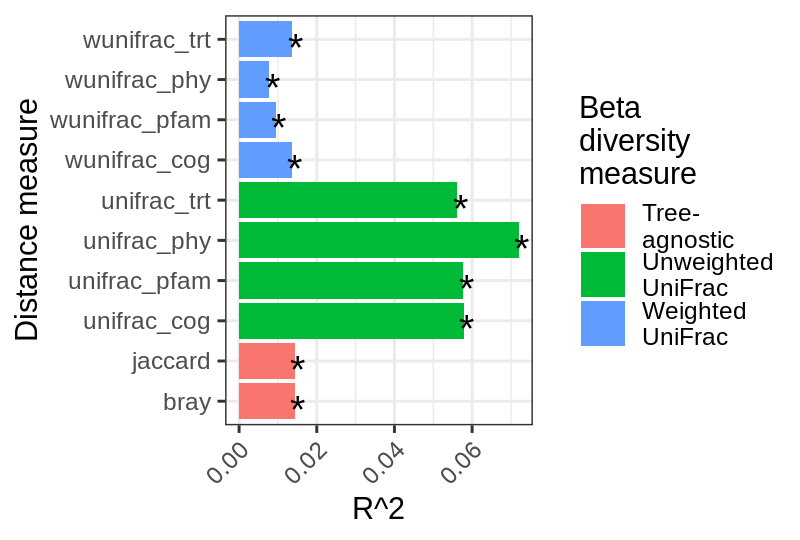

In [37]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, hjust=0.3, vjust=0.8) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(4,2.7)
plot(p)

## Age

In [38]:
# creating env object 
env = meta %>%
    filter.(!is.na(age),
            age != '') %>%
    select.(Sample, age) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,age
,<int>
TRAVELRES1,25
TRAVELRES11,22
⋮,⋮
YEZ_N.38,38
YEZ_N.37,46


In [39]:
# envfit: top 2 PCs
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2) # , Dim3, Dim4, Dim5) 
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.0418237,0.001,age,0.001,1,Dim1,0.9796869
jaccard,0.0414304,0.001,age,0.001,1,Dim1,0.8958470
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
wunifrac_pfamcat,0.02750599,0.001,age,0.001,1,Dim2,-0.3023230
unifrac_pfamcat,0.05885726,0.001,age,0.001,1,Dim2,-0.3927375


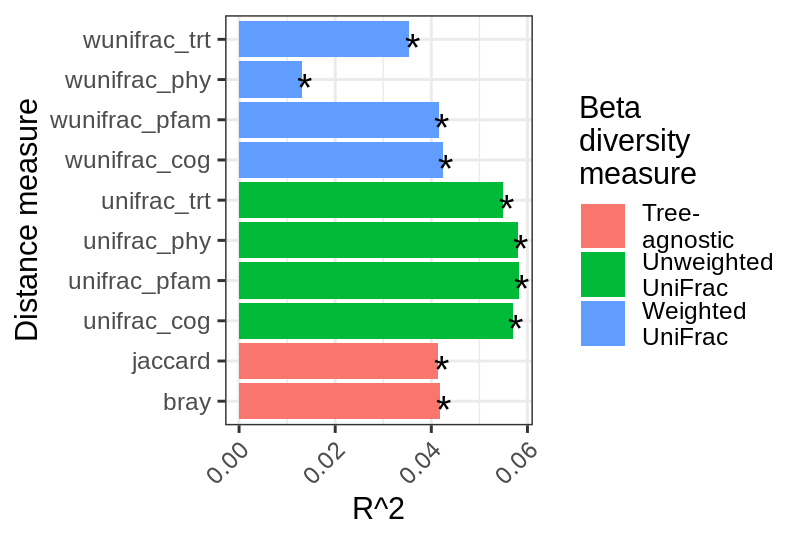

In [40]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(!grepl('cat$', distance)) %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, hjust=0.3, vjust=0.8) +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(4,2.7)
plot(p)

## Westernized & Gender

In [41]:
# creating env object 
env = meta %>%
    filter.(!is.na(westernized), 
            !is.na(gender),
            westernized != '',
            gender != '') %>%
    select.(Sample, westernized, gender) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,westernized,gender
,<lgl>,<chr>
TRAVELRES1,TRUE,female
TRAVELRES11,TRUE,female
⋮,⋮,⋮
YEZ_N.38,TRUE,female
YEZ_N.37,TRUE,male


In [42]:
# envfit: top 2 PCs
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2) # , Dim3, Dim4, Dim5) 
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.40522992,0.001,westernized,0.002,1,Dim1,0.9983779
bray,0.01428306,0.001,gender,0.002,2,Dim1,-0.8409586
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unifrac_pfamcat,0.50343070,0.001,westernized,0.002,1,Dim2,0.1242757
unifrac_pfamcat,0.05824763,0.001,gender,0.002,2,Dim2,0.9382581


In [43]:
# R^2 distribution
specFit %>% summary_x('r2', r2)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
r2,0.004523949,0.03618586,0.09574909,0.2213844,0.4217838,0.5034307,0.208,0.085


In [44]:
# significant?
specFit %>%
    filter(qval < 0.05)

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.40522992,0.001,westernized,0.002,1,Dim1,0.9983779
bray,0.01428306,0.001,gender,0.002,2,Dim1,-0.8409586
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unifrac_pfamcat,0.50343070,0.001,westernized,0.002,1,Dim2,0.1242757
unifrac_pfamcat,0.05824763,0.001,gender,0.002,2,Dim2,0.9382581


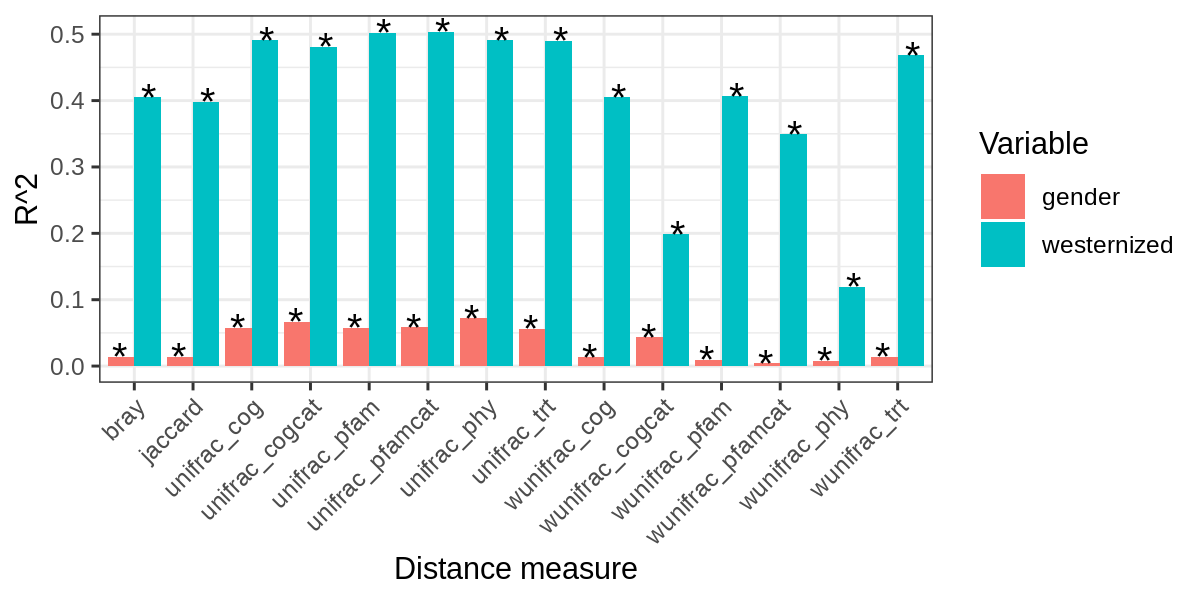

In [45]:
# plotting
p = specFit %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=name)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval),
              position = position_dodge(width = 1),
              size=5) +
    scale_fill_discrete('Variable') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(6,3)
plot(p)

## Westerinzed + gender + age + bmi

In [46]:
# creating env object 
env = meta %>%
    filter.(!is.na(westernized), 
            !is.na(gender),
            !is.na(age),
            !is.na(BMI),
            westernized != '', 
            gender != '',
            age != '', 
            BMI != '') %>%
    mutate.(age = log2(age),
            BMI = car::bcPower(BMI, -1)) %>%
    select(Sample, westernized, gender, age, BMI) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,westernized,gender,age,BMI
,<lgl>,<chr>,<dbl>,<dbl>
SID713A004.11.0.0,FALSE,female,5.584963,0.9589154
SID713A009.11.90.0,FALSE,male,5.523562,0.9656003
⋮,⋮,⋮,⋮,⋮
YEZ_N.38,TRUE,female,5.247928,0.9492386
YEZ_N.37,TRUE,male,5.523562,0.9663300


In [47]:
# envfit: top 2 PCs
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2)#, Dim3, Dim4, Dim5) 
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.19480291,0.001,westernized,0.004,1,Dim1,0.9958544
bray,0.00733745,0.032,gender,0.064,3,Dim1,-0.7474076
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unifrac_pfamcat,0.04229845,0.001,age,0.004,2,Dim2,0.9206534
unifrac_pfamcat,0.01734437,0.001,BMI,0.004,4,Dim2,0.4797132


In [48]:
# summary of adj. p-values
specFit$qval %>% summary_x('q-values')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
q-values,0.004,0.004,0.004,0.02805357,0.02975,0.207,0.08,0.033


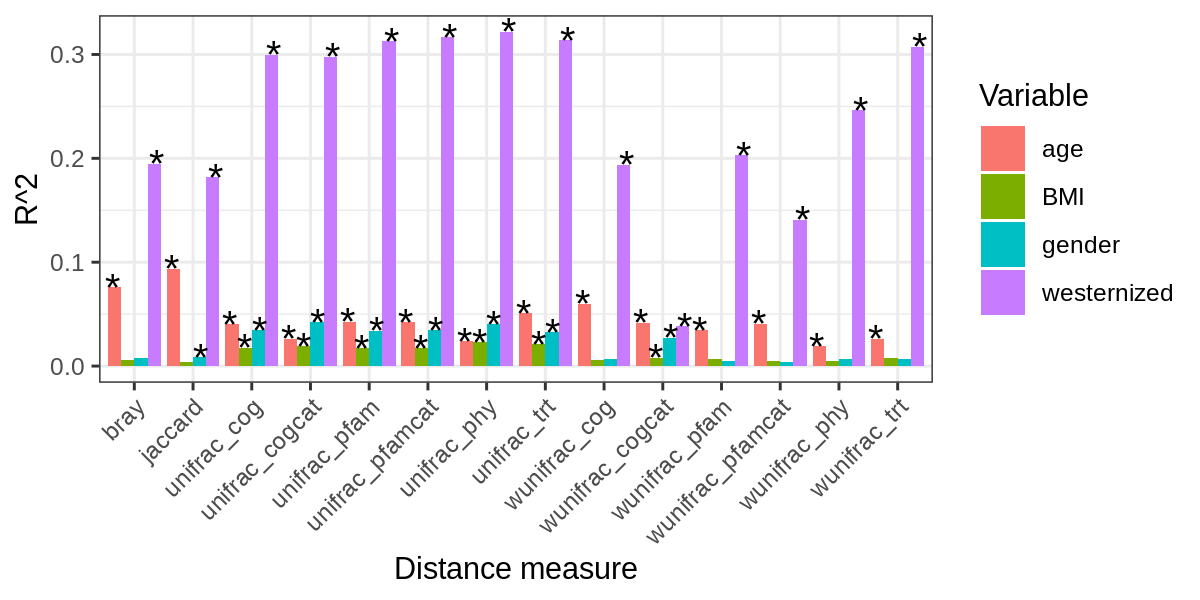

In [49]:
# plotting
p = specFit %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=name)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval),
              position = position_dodge(width = 1),
              size=5) +
    scale_fill_discrete('Variable') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(6,3)
plot(p)

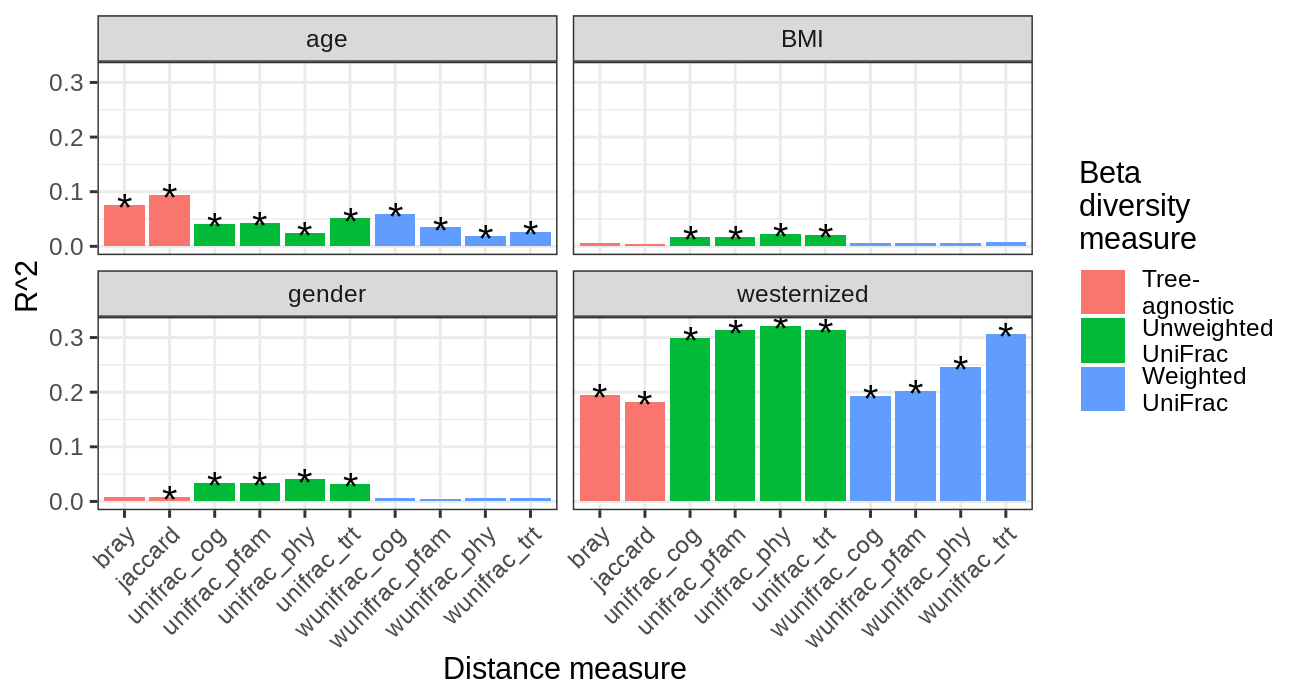

In [50]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    filter(Dim == 'Dim1') %>%
    filter(!grepl('cat$', distance)) %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, vjust=0.6, color='black') +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    facet_wrap(~ name) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(6.5,3.5)
plot(p)

## Westerinzed + gender + age + disease

In [51]:
# creating env object 
env = meta %>%
    mutate.(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    filter.(!is.na(westernized), 
            !is.na(gender),
            !is.na(age),
            !is.na(disease),
            westernized != '',
            gender != '',
            age != '',
            disease != '') %>%
    select.(Sample, westernized, gender, age, disease) %>%
    as.data.frame
rownames(env) = env$Sample
env$Sample = NULL
env

,westernized,gender,age,disease
,<lgl>,<chr>,<int>,<chr>
TRAVELRES1,TRUE,female,25,healthy
TRAVELRES11,TRUE,female,22,healthy
⋮,⋮,⋮,⋮,⋮
YEZ_N.38,TRUE,female,38,healthy
YEZ_N.37,TRUE,male,46,healthy


In [52]:
# envfit: top 2 PCs
specFit = brk_cls_pcoa_obj %>%
    lapply(envfit_parallel, env=env, nperm=999, choices=1:2, threads=threads) %>%
    data.table::rbindlist(use.names=TRUE, idcol='distance') %>%
    as_tibble %>%
    group_by(distance) %>%
    mutate(r2_rank = row_number(-r2)) %>%
    ungroup() %>%
    gather(Dim, Dim_value, Dim1, Dim2)#, Dim3, Dim4, Dim5) 
specFit

distance,r2,pval,name,qval,r2_rank,Dim,Dim_value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
bray,0.41451331,0.001,westernized,0.004,1,Dim1,0.9987134
bray,0.01963086,0.001,gender,0.004,4,Dim1,-0.8722792
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unifrac_pfamcat,0.04339874,0.001,age,0.004,4,Dim2,-0.4850619
unifrac_pfamcat,0.13424394,0.001,disease,0.004,2,Dim2,0.6646857


In [53]:
specFit$qval %>% summary_x('q-values')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
q-values,0.004,0.004,0.004,0.004,0.004,0.004,0,0


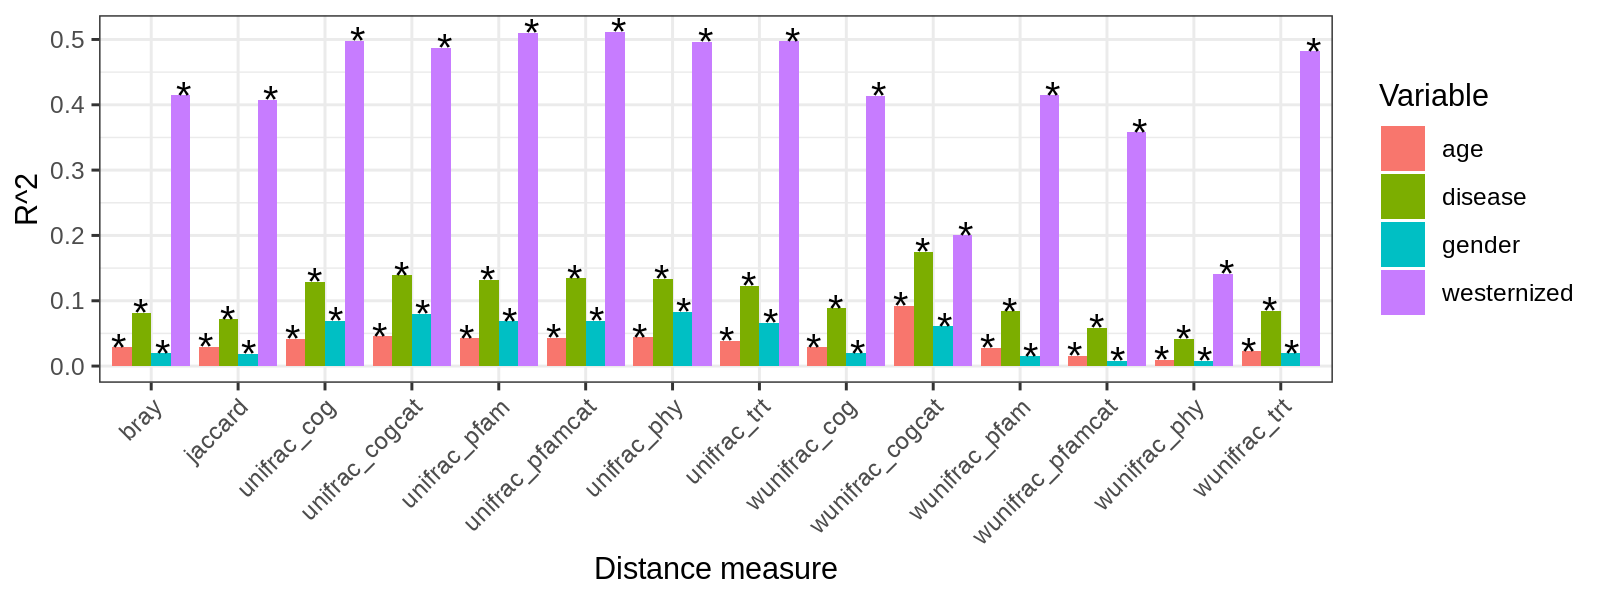

In [54]:
# plotting
p = specFit %>%
    filter(Dim == 'Dim1') %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=name)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval),
              position = position_dodge(width = 1),
              size=5) +
    scale_fill_discrete('Variable') +
    labs(x='Distance measure', y='R^2') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(8,3)
plot(p)

File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/02_comm_diversity/.figures/8a8ddc0311adec241047a4da5c89900c.RDS 


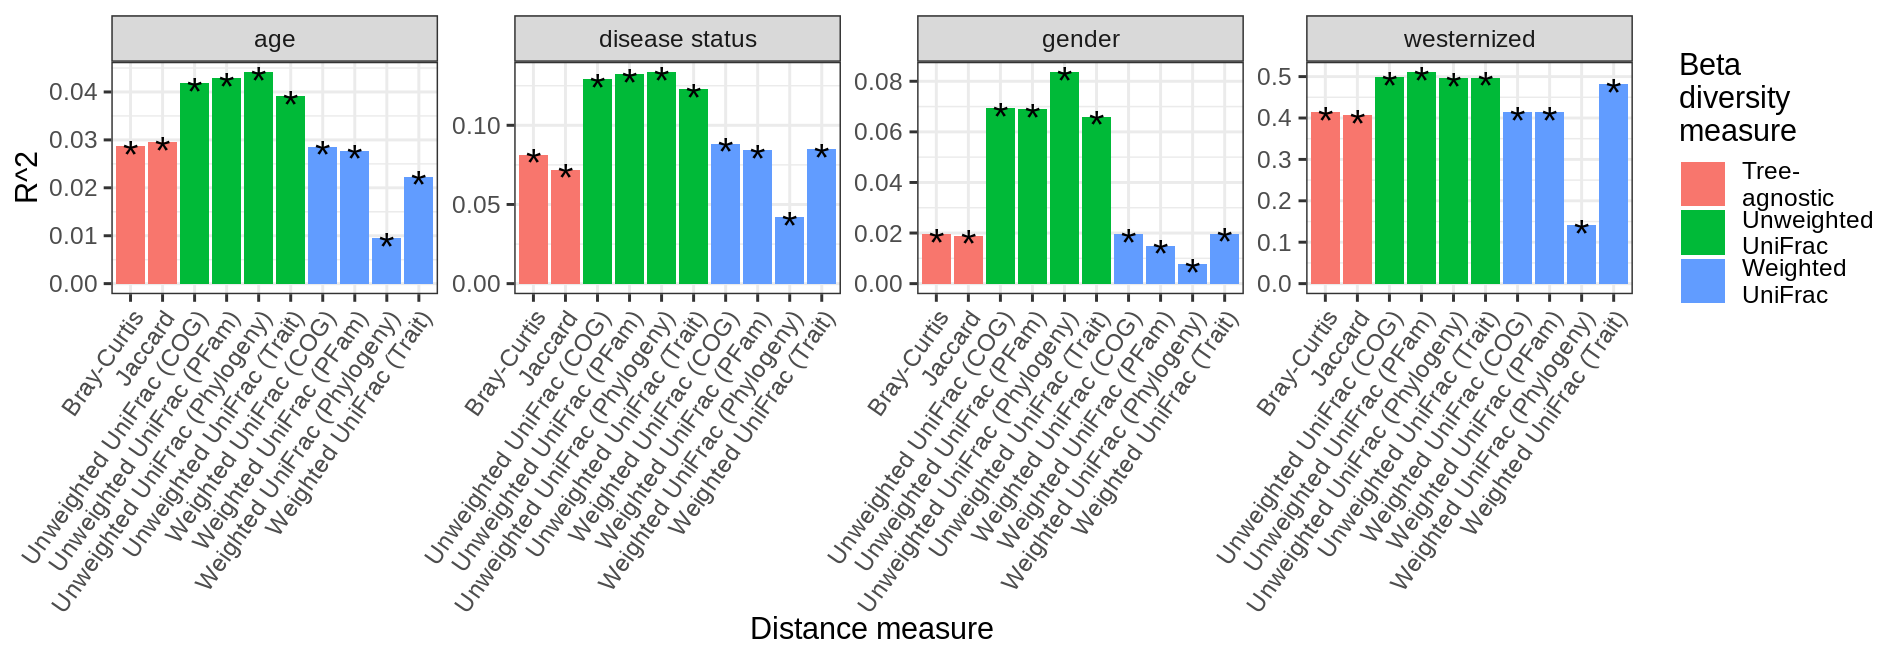

In [56]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    mutate(distance = case_when(distance == 'bray' ~ 'Bray-Curtis',
                                distance == 'jaccard' ~ 'Jaccard',
                                distance == 'unifrac_cog' ~ 'Unweighted UniFrac (COG)',
                                distance == 'unifrac_pfam' ~ 'Unweighted UniFrac (PFam)',
                                distance == 'unifrac_phy' ~ 'Unweighted UniFrac (Phylogeny)',
                                distance == 'unifrac_trt' ~ 'Unweighted UniFrac (Trait)',
                                distance == 'wunifrac_cog' ~ 'Weighted UniFrac (COG)',
                                distance == 'wunifrac_pfam' ~ 'Weighted UniFrac (PFam)',
                                distance == 'wunifrac_phy' ~ 'Weighted UniFrac (Phylogeny)',
                                distance == 'wunifrac_trt' ~ 'Weighted UniFrac (Trait)',
                                TRUE ~ 'Other')) %>%
    filter(distance != 'Other') %>%
    mutate(name = ifelse(name == 'disease', 'disease status', name)) %>%
    filter(Dim == 'Dim1') %>%
    filter(!grepl('cat$', distance)) %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, vjust=0.8, color='black') +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    facet_wrap(~ name, scales='free_y', nrow=1) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(9.5,3.3)
Plot(p)

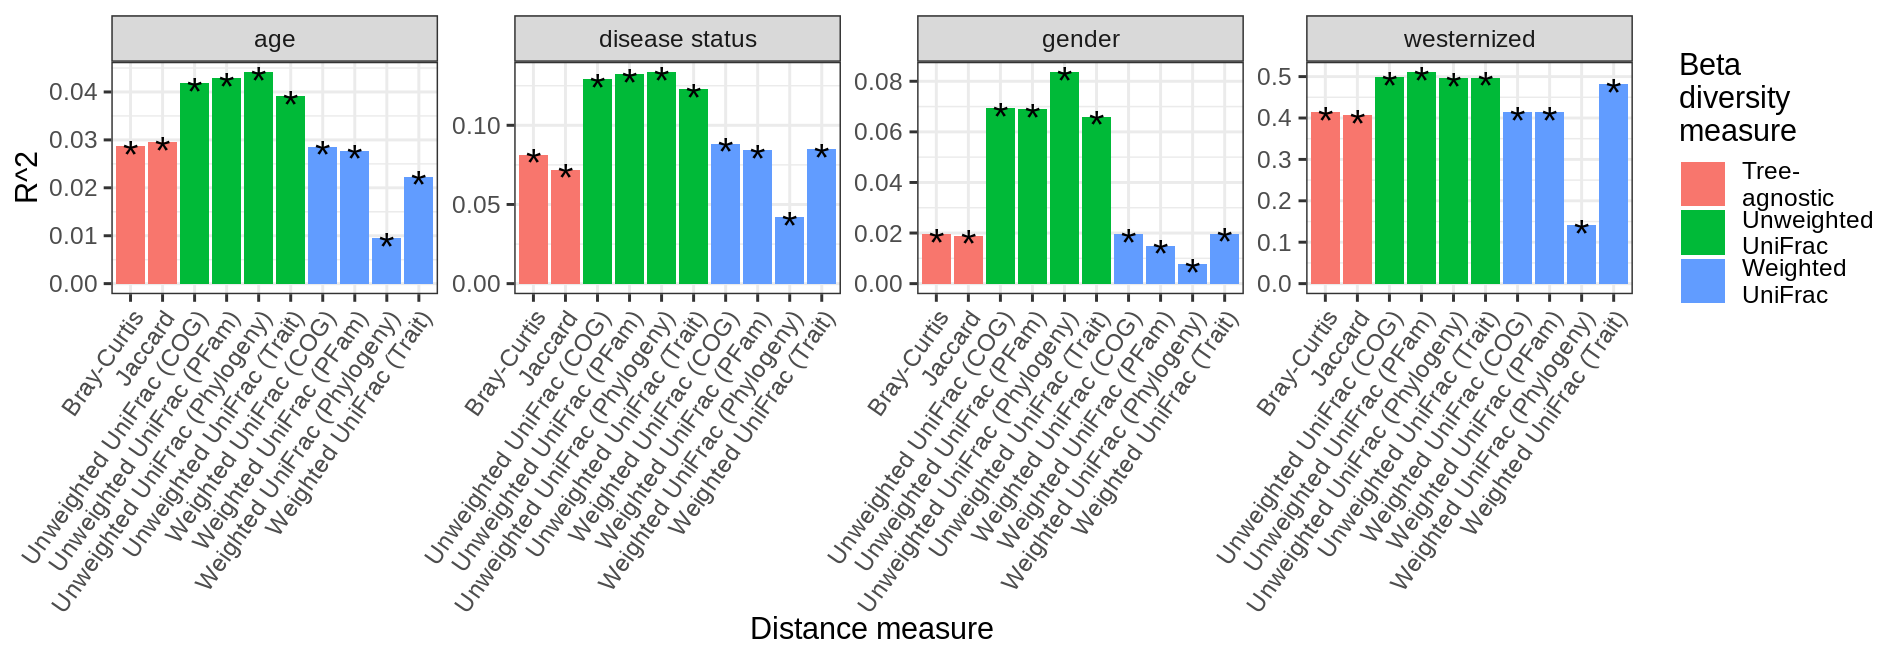

In [68]:
# plotting
p = specFit %>%
    mutate(tree = case_when(grepl('^unifrac', distance) ~ 'Unweighted\nUniFrac',
                            grepl('^wunifrac', distance) ~ 'Weighted\nUniFrac',
                            TRUE ~ 'Tree-\nagnostic')) %>%
    mutate(distance = case_when(distance == 'bray' ~ 'Bray-Curtis',
                                distance == 'jaccard' ~ 'Jaccard',
                                distance == 'unifrac_cog' ~ 'Unweighted UniFrac (COG)',
                                distance == 'unifrac_pfam' ~ 'Unweighted UniFrac (PFam)',
                                distance == 'unifrac_phy' ~ 'Unweighted UniFrac (Phylogeny)',
                                distance == 'unifrac_trt' ~ 'Unweighted UniFrac (Trait)',
                                distance == 'wunifrac_cog' ~ 'Weighted UniFrac (COG)',
                                distance == 'wunifrac_pfam' ~ 'Weighted UniFrac (PFam)',
                                distance == 'wunifrac_phy' ~ 'Weighted UniFrac (Phylogeny)',
                                distance == 'wunifrac_trt' ~ 'Weighted UniFrac (Trait)',
                                TRUE ~ 'Other')) %>%
    filter(distance != 'Other') %>%
    mutate(name = ifelse(name == 'disease', 'disease status', name)) %>%
    filter(Dim == 'Dim2') %>%
    filter(!grepl('cat$', distance)) %>%
    mutate(qval = ifelse(qval < 0.05, '*', ''),
           Dim = gsub('Dim', 'PC', Dim)) %>%
    ggplot(aes(distance, r2, fill=tree)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y=r2, label=qval), size=5, vjust=0.8, color='black') +
    scale_fill_discrete('Beta\ndiversity\nmeasure') +
    labs(x='Distance measure', y='R^2') +
    facet_wrap(~ name, scales='free_y', nrow=1) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(9.5,3.3)
plot(p)

# sessionInfo

In [58]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq2a/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] LeyLabRMisc_0.2.0 vegan_2.5-7       lattice_0.20-44   permute_0.9-5    
 [5] phyloseq_1.36.0   ape_5.5           tidytable_0.6.5   data.table_1.14.0
 [9] ggplot2_3.3.5     tidyr_1.1.3       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] nlme_3.1-153           